## EfficientNetB0

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
# from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import EfficientNetB0
model = EfficientNetB0(weights='imagenet')
# from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

21839872/21834768 [==============================] - 0s 0us/step


In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Colab Notebooks/Dataset/Train'
valid_path = '/content/drive/MyDrive/Colab Notebooks/Dataset/Test'


In [4]:
# Import the EfficientNetB0 library as shown below and add preprocessing layer to the front of EfficientNetB0
# Here we will be using imagenet weights

model = EfficientNetB0(include_top=False, weights='imagenet',input_shape=IMAGE_SIZE + [3])



16711680/16705208 [==============================] - 0s 0us/step


In [5]:
model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling_1 (Rescaling)         (None, 224, 224, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
normalization_1 (Normalization) (None, 224, 224, 3)  7           rescaling_1[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization_1[0][0]            
_____________________________________________________________________________________

In [6]:
# don't train existing weights
for layer in model.layers:
    layer.trainable = False

In [7]:
  # useful for getting number of output classes
import os
folders = os.listdir(train_path)

In [8]:
folders.sort()
folders

['Mahindra Marazzo',
 'Maruti Ciaz',
 'Maruti Ertiga',
 'Tata Tigor',
 'audi a4',
 'bmw 320',
 'chevrolet Uva Sail',
 'chevrolet tavera',
 'force',
 'ford ecosport',
 'ford fiesta',
 'ford figo',
 'honda amaze',
 'honda brv',
 'honda city',
 'honda city zx',
 'honda civic',
 'honda jazz',
 'honda mobilio',
 'honda wrv',
 'hyundai ACCENT',
 'hyundai creta',
 'hyundai eon',
 'hyundai i10',
 'hyundai i20',
 'hyundai santro',
 'hyundai verna',
 'hyundai xcent',
 'kia Carnival',
 'mahindra bolero',
 'mahindra imperio',
 'mahindra scorpio',
 'mahindra tuv300',
 'mahindra xuv500',
 'maruti 800',
 'maruti Celario',
 'maruti alto',
 'maruti baleno',
 'maruti brezza',
 'maruti eeco',
 'maruti ignis',
 'maruti omni',
 'maruti ritz',
 'maruti scross',
 'maruti swift',
 'maruti swift dzire',
 'maruti wagon r',
 'maruti xl6',
 'maruti xx4',
 'maruti zen',
 'maruti zen estilo',
 'nissan kicks',
 'nissan terrano',
 'renault duster',
 'renault kwid',
 'skoda rapid',
 'tata hexa',
 'tata indigo',
 'tata

In [9]:
# Number of output classes
len(folders)

71

### Distribution of classes

#### Distribution of Training data

In [10]:
class_dict = {}
count = 0
for i in glob('/content/drive/MyDrive/Colab Notebooks/Dataset/Train/*'):
  class_dict[count]=len(glob(i+"/*"))
  count+=1

In [11]:
print(class_dict)

{0: 2, 1: 1, 2: 1, 3: 6, 4: 7, 5: 8, 6: 1, 7: 5, 8: 9, 9: 1, 10: 3, 11: 1, 12: 14, 13: 39, 14: 1, 15: 4, 16: 1, 17: 8, 18: 14, 19: 16, 20: 25, 21: 43, 22: 56, 23: 9, 24: 65, 25: 160, 26: 39, 27: 3, 28: 1, 29: 3, 30: 6, 31: 1, 32: 5, 33: 12, 34: 100, 35: 1, 36: 19, 37: 6, 38: 25, 39: 3, 40: 6, 41: 1, 42: 22, 43: 6, 44: 1, 45: 1, 46: 9, 47: 1, 48: 33, 49: 26, 50: 27, 51: 13, 52: 6, 53: 5, 54: 1, 55: 1, 56: 125, 57: 12, 58: 11, 59: 5, 60: 1, 61: 1, 62: 23, 63: 2, 64: 56, 65: 2, 66: 22, 67: 2, 68: 3, 69: 14, 70: 2}


<BarContainer object of 71 artists>

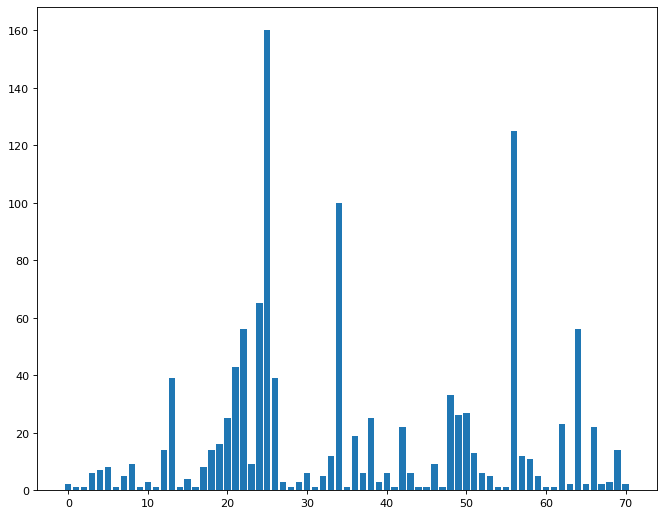

In [12]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.bar(list(class_dict.keys()), list(class_dict.values()))

### Distribution of Test data

In [13]:
class_dict = {}
count = 0
for i in glob('/content/drive/MyDrive/Colab Notebooks/Dataset/Test/*'):
  class_dict[count]=len(glob(i+"/*"))
  count+=1

In [14]:
print(class_dict)

{0: 3, 1: 1, 2: 2, 3: 1, 4: 2, 5: 2, 6: 1, 7: 1, 8: 1, 9: 3, 10: 6, 11: 1, 12: 1, 13: 4, 14: 1, 15: 1, 16: 1, 17: 3, 18: 2, 19: 6, 20: 10, 21: 1, 22: 7, 23: 7, 24: 1, 25: 17, 26: 9, 27: 1, 28: 1, 29: 3, 30: 1, 31: 1, 32: 5, 33: 1, 34: 1, 35: 1, 36: 1, 37: 1, 38: 3, 39: 1, 40: 7, 41: 1, 42: 7, 43: 12, 44: 2, 45: 3, 46: 2, 47: 1, 48: 1, 49: 2, 50: 3, 51: 1, 52: 2, 53: 2, 54: 30, 55: 4, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 1, 62: 4, 63: 3, 64: 1, 65: 1, 66: 5, 67: 1, 68: 2, 69: 2, 70: 10}


<BarContainer object of 71 artists>

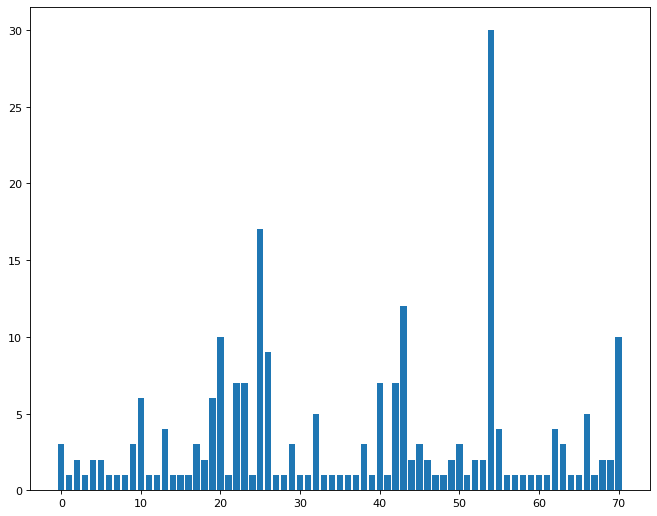

In [15]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.bar(list(class_dict.keys()), list(class_dict.values()))

In [16]:
# our layers - you can add more if you want
x = Flatten()(model.output)

In [17]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=model.input, outputs=prediction)

In [18]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling_1 (Rescaling)         (None, 224, 224, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
normalization_1 (Normalization) (None, 224, 224, 3)  7           rescaling_1[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization_1[0][0]            
______________________________________________________________________________________________

In [19]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [20]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [21]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1164 images belonging to 71 classes.


In [22]:
dic_train = training_set.class_indices
dic_train

{'Mahindra Marazzo': 0,
 'Maruti Ciaz': 1,
 'Maruti Ertiga': 2,
 'Tata Tigor': 3,
 'audi a4': 4,
 'bmw 320': 5,
 'chevrolet Uva Sail': 6,
 'chevrolet tavera': 7,
 'force': 8,
 'ford ecosport': 9,
 'ford fiesta': 10,
 'ford figo': 11,
 'honda amaze': 12,
 'honda brv': 13,
 'honda city': 14,
 'honda city zx': 15,
 'honda civic': 16,
 'honda jazz': 17,
 'honda mobilio': 18,
 'honda wrv': 19,
 'hyundai ACCENT': 20,
 'hyundai creta': 21,
 'hyundai eon': 22,
 'hyundai i10': 23,
 'hyundai i20': 24,
 'hyundai santro': 25,
 'hyundai verna': 26,
 'hyundai xcent': 27,
 'kia Carnival': 28,
 'mahindra bolero': 29,
 'mahindra imperio': 30,
 'mahindra scorpio': 31,
 'mahindra tuv300': 32,
 'mahindra xuv500': 33,
 'maruti 800': 34,
 'maruti Celario': 35,
 'maruti alto': 36,
 'maruti baleno': 37,
 'maruti brezza': 38,
 'maruti eeco': 39,
 'maruti ignis': 40,
 'maruti omni': 41,
 'maruti ritz': 42,
 'maruti scross': 43,
 'maruti swift': 44,
 'maruti swift dzire': 45,
 'maruti wagon r': 46,
 'maruti xl6'

In [23]:
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 231 images belonging to 71 classes.


In [24]:
test_set.classes

array([ 0,  1,  1,  1,  2,  2,  3,  4,  5,  6,  7,  8,  9,  9,  9, 10, 11,
       12, 12, 12, 13, 13, 14, 14, 14, 14, 14, 14, 14, 15, 15, 16, 17, 18,
       19, 19, 19, 20, 20, 21, 21, 21, 21, 21, 21, 21, 22, 22, 23, 23, 23,
       23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
       23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 25, 25,
       25, 25, 25, 26, 26, 26, 26, 27, 27, 27, 28, 29, 29, 29, 29, 29, 29,
       29, 29, 29, 29, 30, 31, 31, 31, 32, 33, 33, 33, 33, 34, 35, 35, 36,
       36, 36, 36, 36, 36, 36, 36, 36, 36, 37, 37, 37, 37, 37, 37, 38, 38,
       38, 38, 38, 38, 38, 39, 39, 39, 39, 40, 40, 41, 41, 42, 42, 43, 44,
       44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 45, 45, 45, 45, 45, 45,
       45, 45, 45, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46,
       46, 46, 46, 47, 48, 49, 50, 51, 52, 52, 53, 53, 53, 54, 55, 56, 57,
       58, 59, 60, 61, 62, 63, 64, 64, 64, 64, 64, 64, 65, 65, 66, 66, 66,
       67, 67, 67, 67, 67

In [25]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
37/37 [==============================] - 452s 12s/step - loss: 22.8591 - accuracy: 0.0472 - val_loss: 20.8298 - val_accuracy: 0.0130
Epoch 2/50
37/37 [==============================] - 19s 520ms/step - loss: 13.4192 - accuracy: 0.0524 - val_loss: 9.5315 - val_accuracy: 0.0390
Epoch 3/50
37/37 [==============================] - 20s 537ms/step - loss: 7.8372 - accuracy: 0.0613 - val_loss: 13.0969 - val_accuracy: 0.0303
Epoch 4/50
37/37 [==============================] - 20s 530ms/step - loss: 8.6638 - accuracy: 0.0430 - val_loss: 17.9142 - val_accuracy: 0.0519
Epoch 5/50
37/37 [==============================] - 19s 527ms/step - loss: 12.4361 - accuracy: 0.0751 - val_loss: 17.6225 - val_accuracy: 0.0519
Epoch 6/50
37/37 [==============================] - 19s 514ms/step - loss: 12.4070 - accuracy: 0.0600 - val_loss: 16.7202 - val_accuracy: 0.0433
Epoch 7/50
37/37 [==============================] - 19s 509ms/step - loss: 11.0641 - accuracy: 0.0678 - val_loss: 15.0781 - val_accura

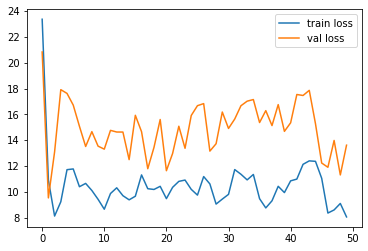

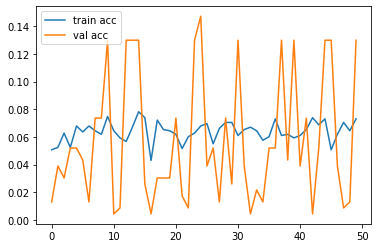

<Figure size 432x288 with 0 Axes>

In [26]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [27]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [28]:
y_pred = model.predict(test_set)

In [29]:
y_pred.shape

(231, 71)

In [30]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [31]:
y_pred

array([23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
       23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
       23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
       23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
       23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
       23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
       23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
       23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
       23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
       23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
       23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
       23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
       23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
       23, 23, 23, 23, 23

In [32]:
y_true = test_set.classes
y_true

array([ 0,  1,  1,  1,  2,  2,  3,  4,  5,  6,  7,  8,  9,  9,  9, 10, 11,
       12, 12, 12, 13, 13, 14, 14, 14, 14, 14, 14, 14, 15, 15, 16, 17, 18,
       19, 19, 19, 20, 20, 21, 21, 21, 21, 21, 21, 21, 22, 22, 23, 23, 23,
       23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
       23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 25, 25,
       25, 25, 25, 26, 26, 26, 26, 27, 27, 27, 28, 29, 29, 29, 29, 29, 29,
       29, 29, 29, 29, 30, 31, 31, 31, 32, 33, 33, 33, 33, 34, 35, 35, 36,
       36, 36, 36, 36, 36, 36, 36, 36, 36, 37, 37, 37, 37, 37, 37, 38, 38,
       38, 38, 38, 38, 38, 39, 39, 39, 39, 40, 40, 41, 41, 42, 42, 43, 44,
       44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 45, 45, 45, 45, 45, 45,
       45, 45, 45, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46,
       46, 46, 46, 47, 48, 49, 50, 51, 52, 52, 53, 53, 53, 54, 55, 56, 57,
       58, 59, 60, 61, 62, 63, 64, 64, 64, 64, 64, 64, 65, 65, 66, 66, 66,
       67, 67, 67, 67, 67

In [33]:
np.unique(y_pred)

array([23])

In [34]:
# Labels (y_true)
print("Name\t\t\tIndex")
for key,val in dic_train.items():
  print("{0:25}{1}".format(key,val))

Name			Index
Mahindra Marazzo         0
Maruti Ciaz              1
Maruti Ertiga            2
Tata Tigor               3
audi a4                  4
bmw 320                  5
chevrolet Uva Sail       6
chevrolet tavera         7
force                    8
ford ecosport            9
ford fiesta              10
ford figo                11
honda amaze              12
honda brv                13
honda city               14
honda city zx            15
honda civic              16
honda jazz               17
honda mobilio            18
honda wrv                19
hyundai ACCENT           20
hyundai creta            21
hyundai eon              22
hyundai i10              23
hyundai i20              24
hyundai santro           25
hyundai verna            26
hyundai xcent            27
kia Carnival             28
mahindra bolero          29
mahindra imperio         30
mahindra scorpio         31
mahindra tuv300          32
mahindra xuv500          33
maruti 800               34
maruti Celario   

In [35]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_true, y_pred))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [36]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         7
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         1
          17       0.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
print(len(set(y_true) - set(y_pred)))

70


### Conclusion 

There are 70 classes which are not being predicted by the model.

